## Hair Loss Prediction: ML Project

### Project Setup

In [42]:
#importing the Dependencies and Libraries 
from pathlib import Path

#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for modeling
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

#for metrics and other functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

#for saving models
import pickle 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#importing the data
hair = Path("C:/Users/Phill/OneDrive/Documents/Python Scripts/hair loss/hair data.csv")
hair_df = pd.read_csv(hair.resolve(), sep=',')

In [3]:
#first five rows of the dataset
hair_df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [4]:
#last five rows of the dataset
hair_df.tail()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1
998,127183,Yes,Yes,Psoriasis,Blood Pressure Medication,Vitamin D Deficiency,Low,34,No,Yes,No,No,1


In [5]:
#number of rows and columns
hair_df.shape

(999, 13)

### Analysis and Preprocessing

In [6]:
#statistical measures of the dataset & outlier check
hair_df[['Age', 'Hair Loss']].describe()

,Age,Hair Loss
count,999.000000,999.000000
mean,34.188188,0.497497
std,9.377980,0.500244
min,18.000000,0.000000
25%,26.000000,0.000000
50%,34.000000,0.000000
75%,42.000000,1.000000
max,50.000000,1.000000


The mean of the Hair Loss column suggests that it is a fairly balanced pool of candidates in this study. 

In [7]:
#getting some information about the data 
hair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [8]:
#checking for missing values 
hair_df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

The last two cells indicate that there are no missing/null entries within the dataset. To further confirm, we will review the values within some of the columns to confirm, as there may be a placeholder value in use. 

In [9]:
#renaming columns for clarity and use
hair_df = hair_df.rename(columns={'Genetics': 'genetics',
                        'Hormonal Changes': 'hormone_change',
                        'Medical Conditions': 'med_conditions',
                        'Medications & Treatments': 'med_and_treat',
                        'Nutritional Deficiencies ': 'nutrition_def',
                        'Stress': 'stress',
                        'Age': 'age',
                        'Poor Hair Care Habits ': 'poor_hair_habits', 
                        'Environmental Factors': 'enviro_factors', 
                        'Smoking': 'smoking',
                        'Weight Loss ': 'weight_loss',    
                        'Hair Loss': 'hair_loss'})

#confirm column name changes 
hair_df.head()

,Id,genetics,hormone_change,med_conditions,med_and_treat,nutrition_def,stress,age,poor_hair_habits,enviro_factors,smoking,weight_loss,hair_loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [10]:
#checking values of columns with only 2-3 values
print(hair_df['genetics'].value_counts())
print(' ')
print(hair_df['hormone_change'].value_counts())
print(' ')
print(hair_df['stress'].value_counts())
print(' ')
print(hair_df['poor_hair_habits'].value_counts())
print(' ')
print(hair_df['enviro_factors'].value_counts())
print(' ')
print(hair_df['smoking'].value_counts())
print(' ')
print(hair_df['weight_loss'].value_counts())
print(' ')
print(hair_df['hair_loss'].value_counts())

genetics
Yes    522
No     477
Name: count, dtype: int64
 
hormone_change
Yes    509
No     490
Name: count, dtype: int64
 
stress
Moderate    351
Low         327
High        321
Name: count, dtype: int64
 
poor_hair_habits
No     507
Yes    492
Name: count, dtype: int64
 
enviro_factors
Yes    508
No     491
Name: count, dtype: int64
 
smoking
Yes    519
No     480
Name: count, dtype: int64
 
weight_loss
No     527
Yes    472
Name: count, dtype: int64
 
hair_loss
0    502
1    497
Name: count, dtype: int64


There does not appear to be any missing values filled by placeholders in these columns. 

In [11]:
#checking values of columns with more than 2-3 values
print(hair_df['med_conditions'].value_counts())
print(' ')
print(hair_df['med_and_treat'].value_counts())
print(' ')
print(hair_df['nutrition_def'].value_counts())

med_conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64
 
med_and_treat
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No Data                        2
Name: count, dtype: int64
 
nutrition_def
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency   

In these three columns we find that there are entries entered as 'No Data', however for the given subject matter of each column, it appears to be a proper entry. For example, if the person does not take any medications or hasn't received any treatments then they would have nothing to enter, but it's still a recorded entry. 

In [12]:
#checking for duplicates 
hair_df.duplicated().sum()

0

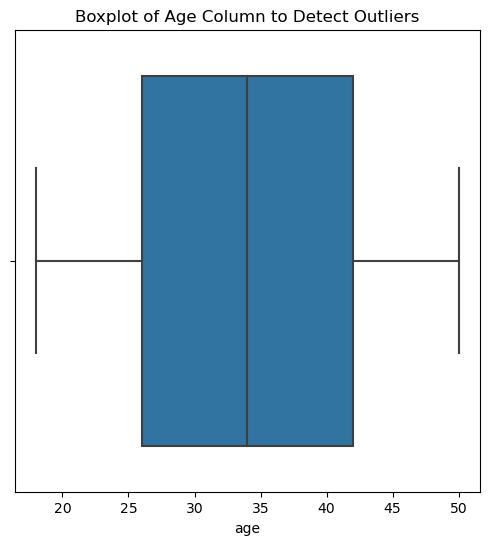

In [13]:
#ensuring no outliers in the data --> age column, as supported by the statistical measures above
plt.figure(figsize=(6,6))
plt.title('Boxplot of Age Column to Detect Outliers', fontsize=12)
sns.boxplot(x=hair_df['age'])
plt.show()

Given the value counts and box plot above, there appears to be no wrongful or omitted entries within the datset.

### Exploratory Data Analysis

In [14]:
#understanding the balance of our outcome variable: hair_loss
hair_df['hair_loss'].value_counts(normalize=True)

hair_loss
0    0.502503
1    0.497497
Name: proportion, dtype: float64

As assumed above, we can confirm that our outcome variable is well-balanced and does not require any resampling.

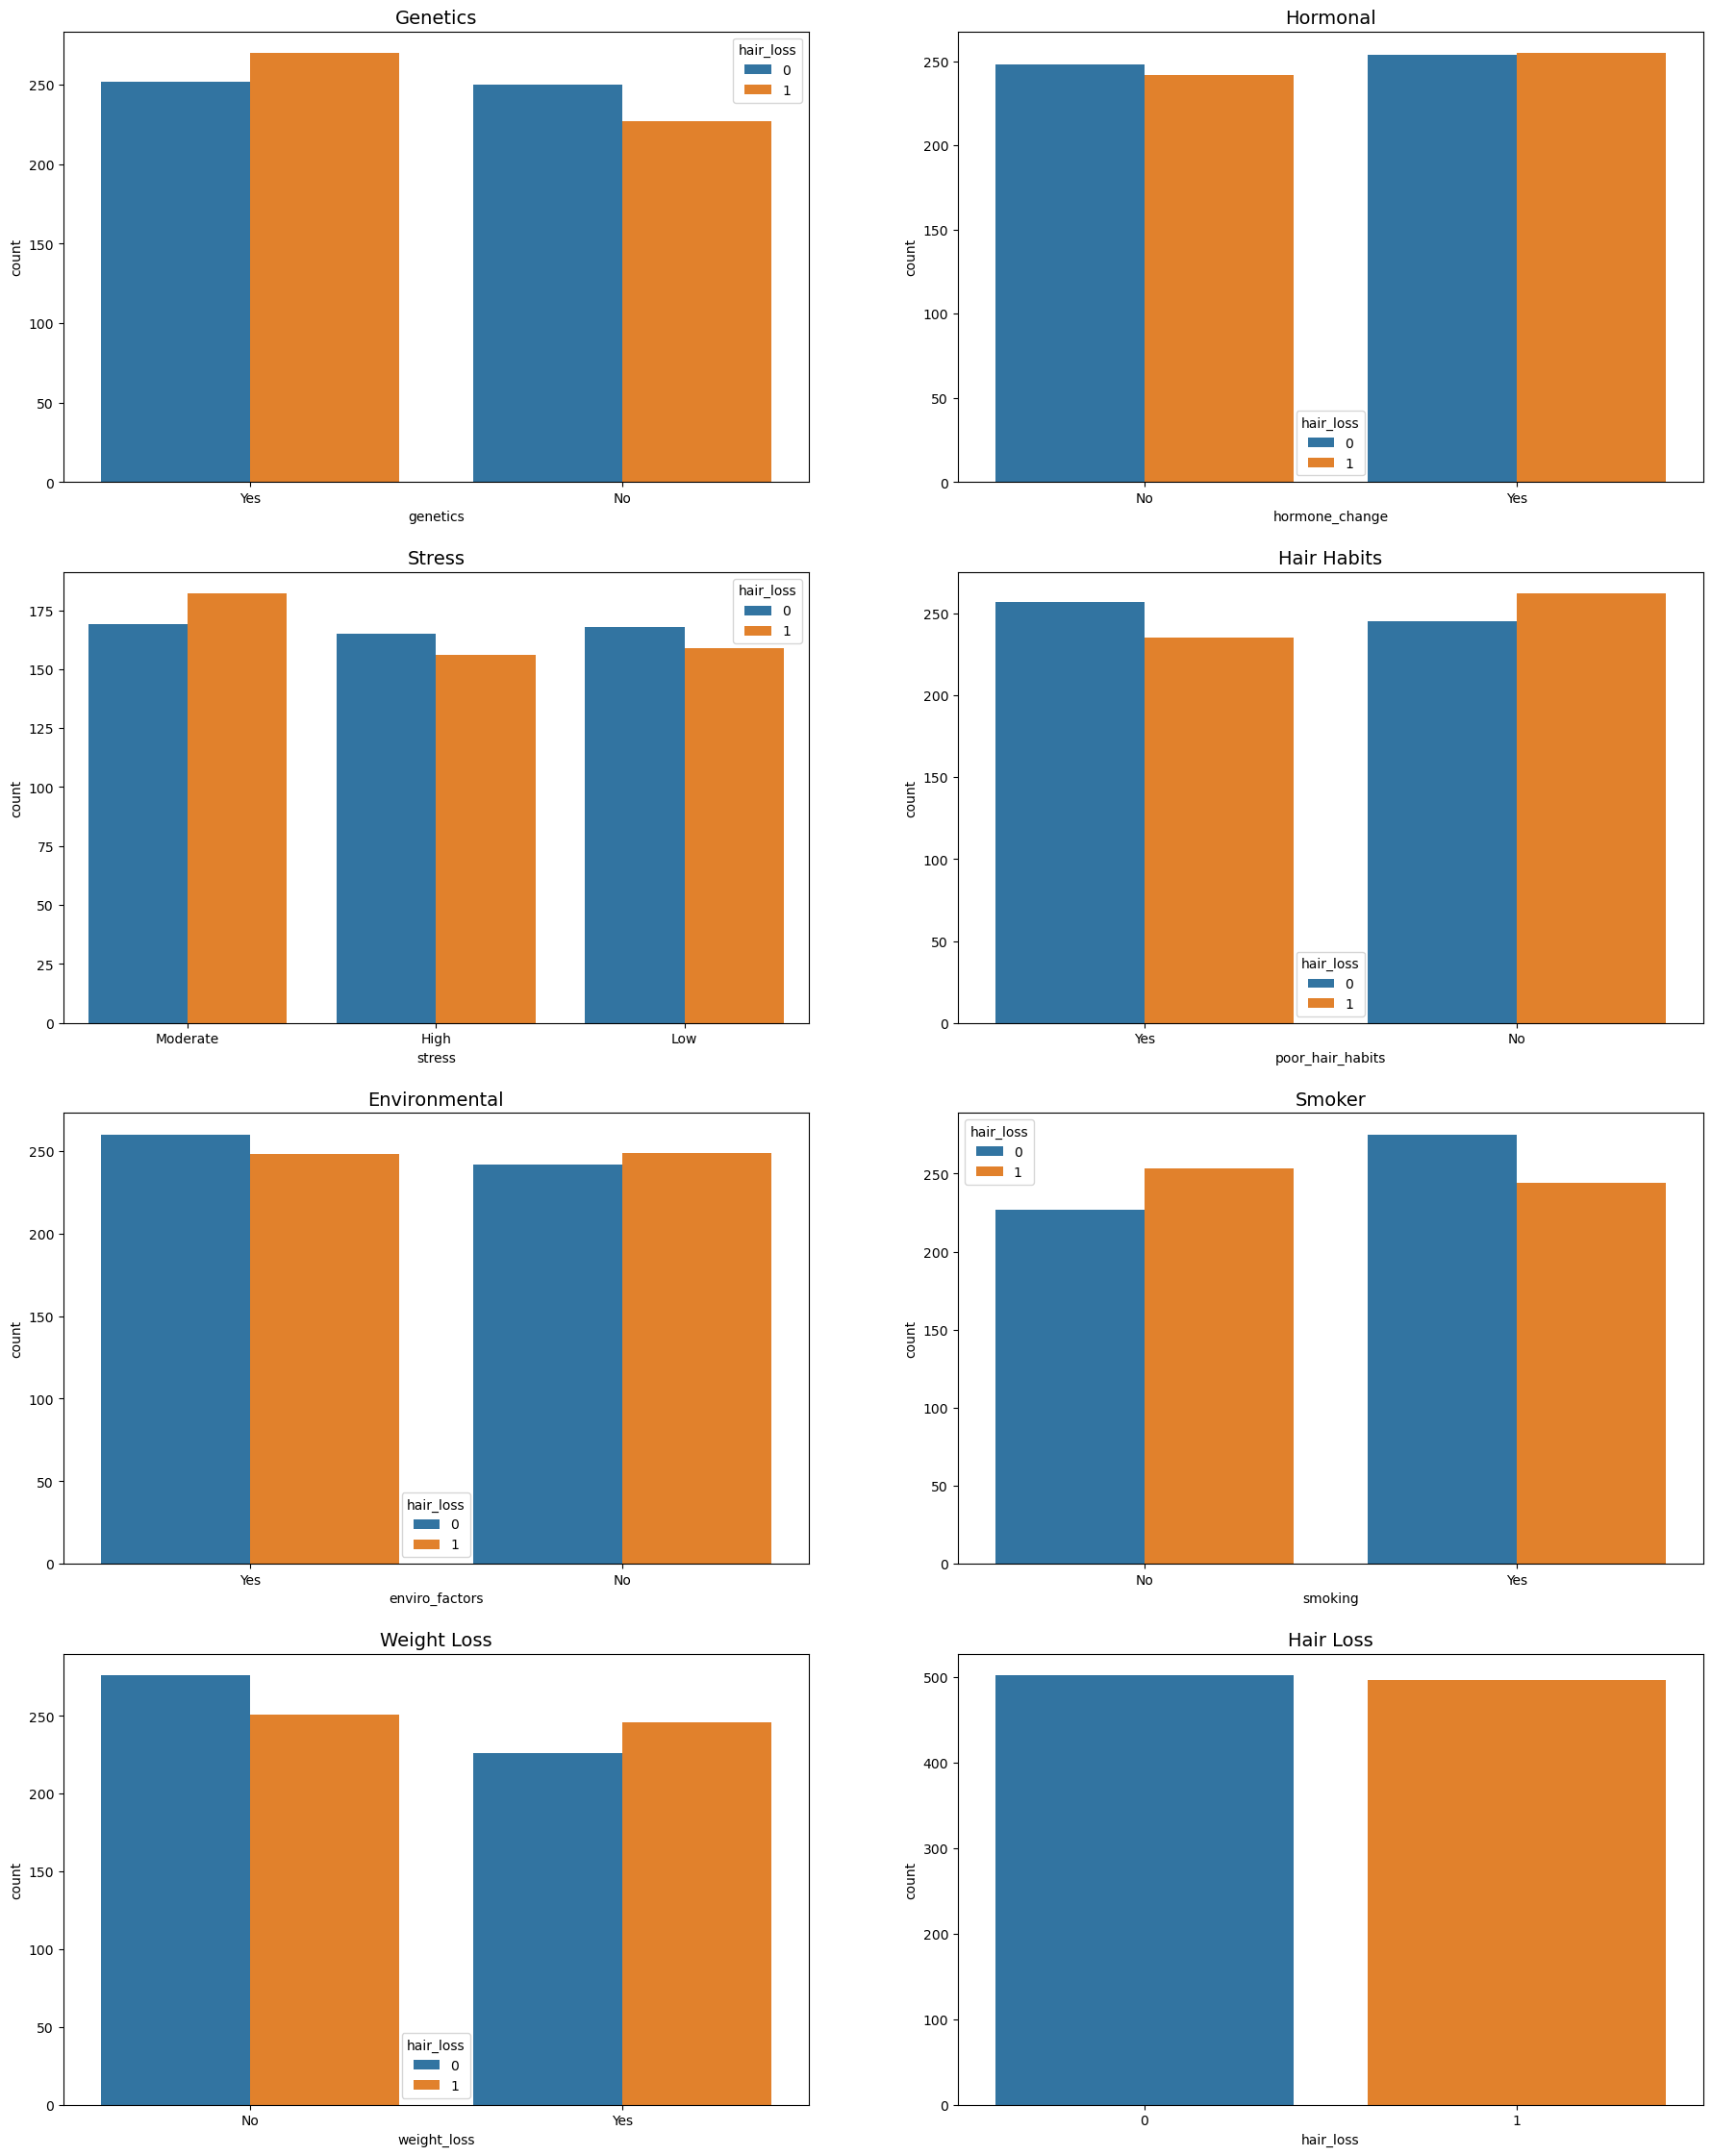

In [15]:
#Create countplot graphs for 'Yes'/'No' response columns
fig, ax = plt.subplots(4,2, figsize= (22,28))

sns.countplot(data=hair_df, x='genetics', hue='hair_loss', ax=ax[0,0])
ax[0,0].set_title('Genetics', fontsize=14)

sns.countplot(data=hair_df, x='hormone_change', hue='hair_loss', ax=ax[0,1])
ax[0,1].set_title('Hormonal', fontsize=14)

sns.countplot(data=hair_df, x='stress', hue='hair_loss', ax=ax[1,0])
ax[1,0].set_title('Stress', fontsize=14)

sns.countplot(data=hair_df, x='poor_hair_habits', hue='hair_loss', ax=ax[1,1])
ax[1,1].set_title('Hair Habits', fontsize=14)

sns.countplot(data=hair_df, x='enviro_factors', hue='hair_loss', ax=ax[2,0])
ax[2,0].set_title('Environmental', fontsize=14)

sns.countplot(data=hair_df, x='smoking', hue='hair_loss', ax=ax[2,1])
ax[2,1].set_title('Smoker', fontsize=14)

sns.countplot(data=hair_df, x='weight_loss', hue='hair_loss', ax=ax[3,0])
ax[3,0].set_title('Weight Loss', fontsize=14)

sns.countplot(data=hair_df, x='hair_loss', ax=ax[3,1])
ax[3,1].set_title('Hair Loss', fontsize=14)

plt.show()

These results are fascinating. For most of these graphs we do not find any radical takeaways and some even seem to be counter intuitive. When looking over poor hair health for instance, we see that the ratio of people that have no hair loss compared to those that do is higher in respondents with poor habits. We find a similar result when reviewing the smoker and environmental graphs. The one graph that is aligned (to an extent) with expectations is the genetics graph, depicting that it plays a role in hair loss. 

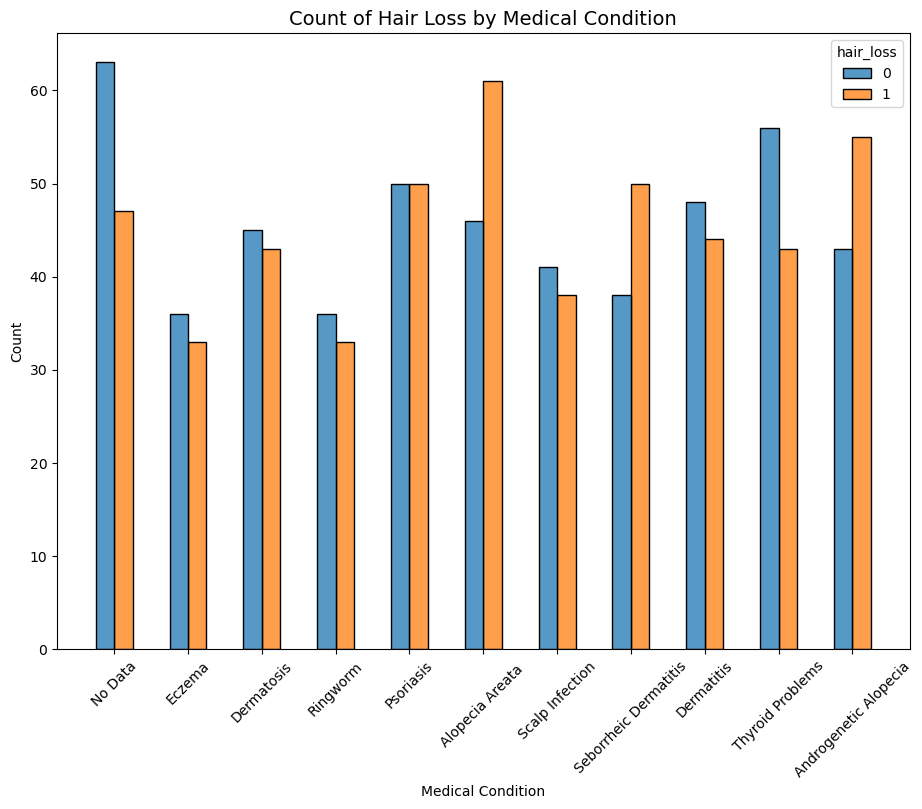

In [16]:
#histogram to compare medical condition distribution of respondents who have experienced hair loss and those that haven't
plt.figure(figsize=(11,8))
sns.histplot(data=hair_df, x='med_conditions', hue='hair_loss', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.title('Count of Hair Loss by Medical Condition', fontsize=14);

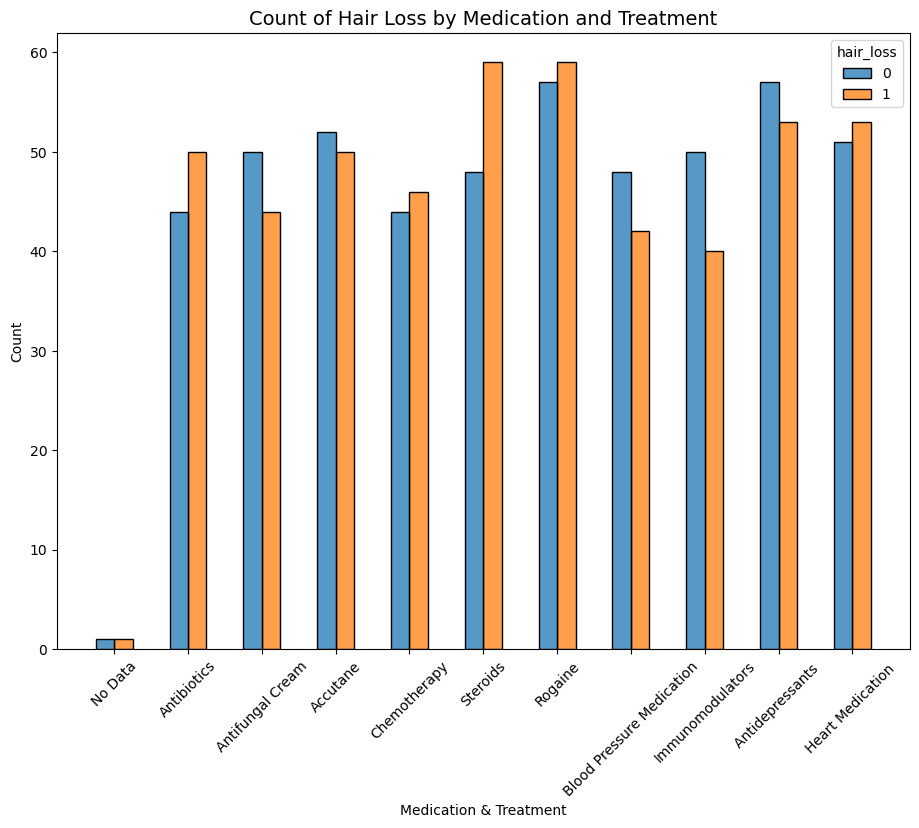

In [17]:
#histogram to compare medicine & treatment distribution of respondents who have experienced hair loss and those that haven't
plt.figure(figsize=(11,8))
sns.histplot(data=hair_df, x='med_and_treat', hue='hair_loss', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.xlabel('Medication & Treatment')
plt.title('Count of Hair Loss by Medication and Treatment', fontsize=14);

With this graph depicting hair loss based on medication and treatment, we find that most of these differences could come down to sampling. However, we do find that steroid users have a lower hair retention ratio while immunomodulator users have a higher hair retention ratio. 

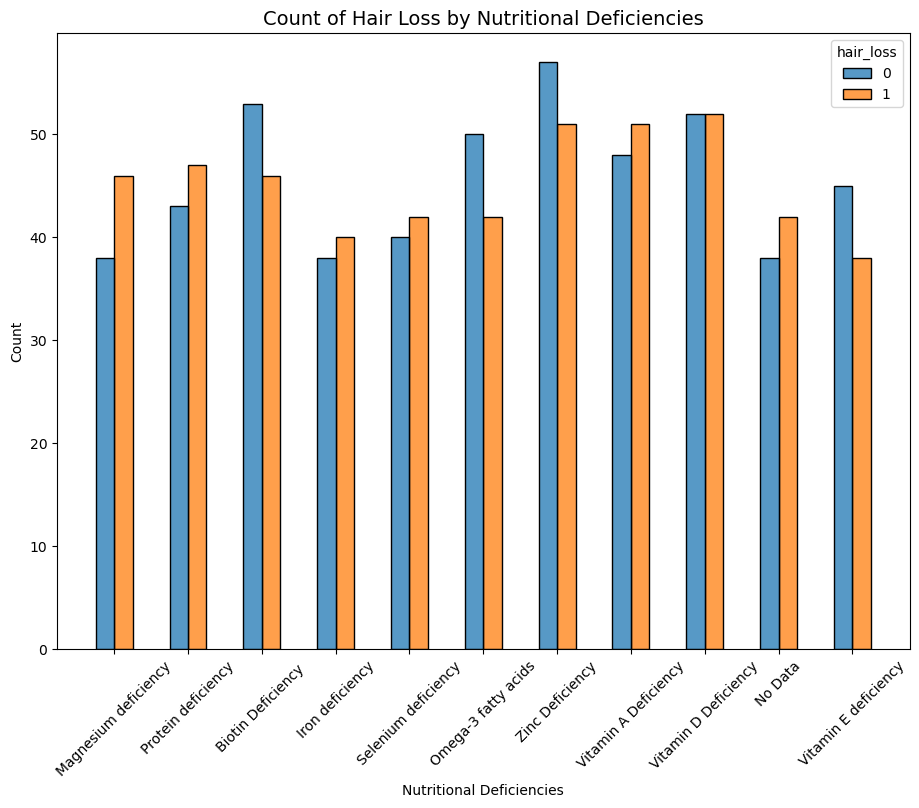

In [18]:
#histogram to compare nutrtion deficiencies distribution of respondents who have experienced hair loss and those that haven't
plt.figure(figsize=(11,8))
sns.histplot(data=hair_df, x='nutrition_def', hue='hair_loss', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.xlabel('Nutritional Deficiencies')
plt.title('Count of Hair Loss by Nutritional Deficiencies', fontsize=14);

Much like the previous graph, we do not have crazy ratios and clear indicators. It is interesting to think that amongst any deficiencies we find a higher hair retention ratio. Some standouts that appear to indicate such a possibility are a deficiency in Vitamin E, biotin, and Omega-3 fatty acids. As for the opposite trend, only a deficiency in magnesium seems to lead to a lower hair retention ratio. 

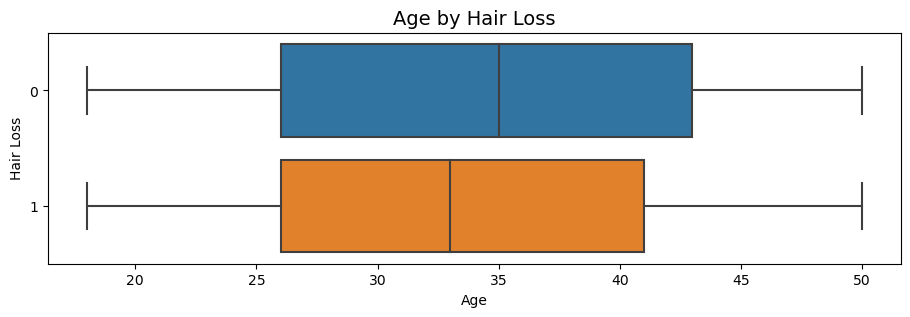

In [19]:
#box plots of age seperated by those who have hair loss and those do not
plt.figure(figsize=(11,3))
sns.boxplot(x=hair_df['age'], y=hair_df['hair_loss'], orient='h')
plt.title('Age by Hair Loss', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Hair Loss')
plt.show()

With these boxplots we do find that the average age is off by a few years. We also see that those with hair loss have a more concentrated range within one quartile of the median. 

### Potential Insights

These visualizations do not appear to reveal too much. While we can make some assumptions, it may be that the discernemt of hair loss comes down to different groupings of conditions that we cannot visualize. If this is not the case then the model may be able to benefit from some feature engineering, however it just may be that there is no direct way to conclude the potential of hair loss given our data.

To quickly test the grouping of conditions we will run a small test on different yes/no features. 

Text(0.5, 1.0, 'Poor Habits & Weight Loss')

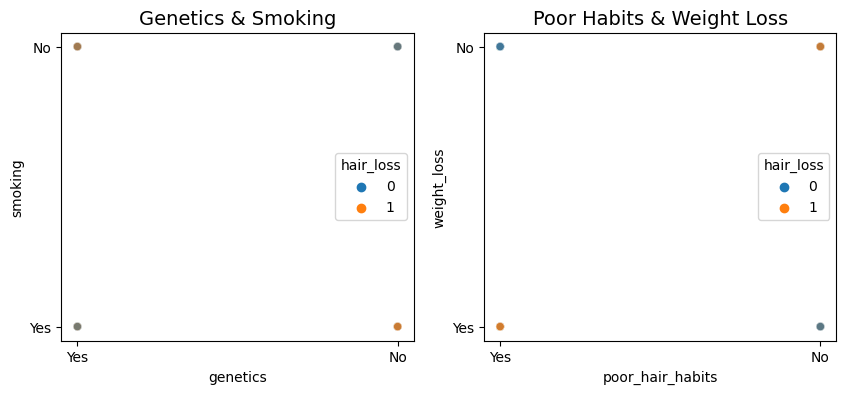

In [20]:
fig, ax = plt.subplots(1,2, figsize= (10,4))

sns.scatterplot(data=hair_df, x='genetics', y='smoking', hue='hair_loss', alpha=0.4, ax=ax[0])
ax[0].set_title('Genetics & Smoking', fontsize=14)

sns.scatterplot(data=hair_df, x='poor_hair_habits', y='weight_loss', hue='hair_loss', alpha=0.4, ax=ax[1])
ax[1].set_title('Poor Habits & Weight Loss', fontsize=14)

These two graphs show potential! The color of each corner indicates how present the hue variable is, which in this case is hair loss. In the Genetics and Smoking graph, it appears that their is a higher amount of people with hair loss when they smoke but do not have genetic history of hair loss. In the Poor Habits and Weight Loss graph we find that people with both show a higher concentration of hair loss. It is also interesting to find that the same is true for people who have neither. Nonetheless, it does indicate that given the groupings of conditions, we may be able to determine the possibility of hair loss. 

### Preparing The Data for the Models

In [21]:
#copying the datset 
hair_m = hair_df.copy()

#removing the Id column
hair_m = hair_m.drop(columns='Id', axis=1)

hair_m.head()

,genetics,hormone_change,med_conditions,med_and_treat,nutrition_def,stress,age,poor_hair_habits,enviro_factors,smoking,weight_loss,hair_loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [22]:
#encoding stress column as an ordinal numeric category
hair_m['stress'] = (hair_m['stress'].astype('category').cat.set_categories(['low', 'Moderate', 'High']).cat.codes)

#encoding yes/no columns
df_columns = ['genetics', 'hormone_change', 'poor_hair_habits', 'enviro_factors', 'smoking', 'weight_loss']

for column in df_columns:
    hair_m.replace({column:{'No':0, 'Yes':1}}, inplace=True)
    
#confirming changes 
hair_m.head()

,genetics,hormone_change,med_conditions,med_and_treat,nutrition_def,stress,age,poor_hair_habits,enviro_factors,smoking,weight_loss,hair_loss
0,1,0,No Data,No Data,Magnesium deficiency,1,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,2,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,1,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,1,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,1,30,0,1,1,0,1


In [23]:
#encoding categorical columns with multiple categories
hair_enc = pd.get_dummies(hair_m, drop_first=False, dtype=int)

#confirming changes
hair_enc.head()

,genetics,hormone_change,stress,age,poor_hair_habits,enviro_factors,smoking,weight_loss,hair_loss,med_conditions_Alopecia Areata,...,nutrition_def_Iron deficiency,nutrition_def_Magnesium deficiency,nutrition_def_No Data,nutrition_def_Omega-3 fatty acids,nutrition_def_Protein deficiency,nutrition_def_Selenium deficiency,nutrition_def_Vitamin A Deficiency,nutrition_def_Vitamin D Deficiency,nutrition_def_Vitamin E deficiency,nutrition_def_Zinc Deficiency
0,1,0,1,19,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,2,43,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,26,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,46,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,30,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Splitting the Data

In [24]:
#isolating the outcome variable 
y = hair_enc['hair_loss']

#checking variable
y.head()

0    0
1    0
2    0
3    0
4    1
Name: hair_loss, dtype: int64

In [25]:
#separating the features for the model
X = hair_enc.drop(columns='hair_loss', axis=1)

#checking features
X.head()

,genetics,hormone_change,stress,age,poor_hair_habits,enviro_factors,smoking,weight_loss,med_conditions_Alopecia Areata,med_conditions_Androgenetic Alopecia,...,nutrition_def_Iron deficiency,nutrition_def_Magnesium deficiency,nutrition_def_No Data,nutrition_def_Omega-3 fatty acids,nutrition_def_Protein deficiency,nutrition_def_Selenium deficiency,nutrition_def_Vitamin A Deficiency,nutrition_def_Vitamin D Deficiency,nutrition_def_Vitamin E deficiency,nutrition_def_Zinc Deficiency
0,1,0,1,19,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,2,43,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,26,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,46,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,30,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
#splitting into train and test sets 
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

#splitting into train and validate sets 
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=1)

In [27]:
#verify set shapes
print(X_train.shape, X_val.shape, X_test.shape)

(599, 41) (200, 41) (200, 41)


### Standard Scaler

In [28]:
#creating scaler
scaler = StandardScaler()

#fitting the scaler
scaler.fit(X_train)

#scaling the data
X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

Adds to 999 observations as expected. 

### Logistic Regression Model

Note: We can conclude that the entries are independent observations, the dataset does not include any outliers, and there is little to no presence of multicolinearity. 

In [29]:
#construct Logisitic Regression model and fit the training data
log_hair = LogisticRegression(random_state=1, max_iter=500).fit(X_train, y_train)

In [30]:
#using the logistic regression model to get predictions on the train set 
train_pred = log_hair.predict(X_train)

#getting accuracy score on training set 
train_acc = accuracy_score(y_train, train_pred)
print('Accuracy Score on Training Data:', train_acc)

#using the logistic regression model to get predictions on the validation set 
val_pred = log_hair.predict(X_val)


#getting accuracy score on validation set 
val_acc = accuracy_score(y_val, val_pred)
print('Accuracy Score on Validation Data:', val_acc)

Accuracy Score on Training Data: 0.5859766277128547
Accuracy Score on Validation Data: 0.5


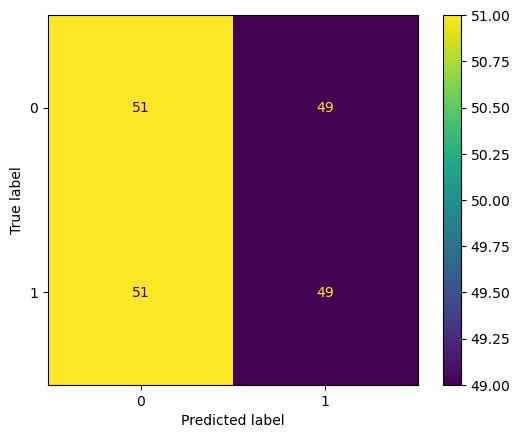

In [31]:
#compute values for confusion matrix
log_cm = confusion_matrix(y_val, val_pred, labels=log_hair.classes_)

#create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_hair.classes_)

#plot matrix
log_disp.plot(values_format='')

#display
plt.show()

upper-left: number of true negatives

upper-right: number of false positives

bottom-left: number of false negatives

bottom-right: number of true positives

In a perfect world, we would not have any values in the the upper right or bottom left, or at least a lot less. It seems that this model is not incredible at predicting hair loss. That said, we will run the same steps on a Random Forest model and check the results. If they are roughly the same, we will need to employ some feature engineering to get better results. 

In [32]:
#classification report for the logistic regression model
target_names = ['Predicted would not lose hair', 'Predicted would lose hair']
print(classification_report(y_val, val_pred, target_names=target_names)) 

                               precision    recall  f1-score   support

Predicted would not lose hair       0.50      0.51      0.50       100
    Predicted would lose hair       0.50      0.49      0.49       100

                     accuracy                           0.50       200
                    macro avg       0.50      0.50      0.50       200
                 weighted avg       0.50      0.50      0.50       200



The classification report above shows that the model achieved a precision of 50%, recall of 50%, and a f1-score of 50% (weighted). Regardless of it's more important to predict those that lose hair or those that don't, the scores do not change much. 

What appears to be happening is that it is equally likely to predict any of the four outcomes, only being right half of the time. 

### Random Forest Model

In [33]:
#instantiate random forest classifier 
rf_hair = RandomForestClassifier(random_state=1)

#create dictionary of hyperparameters to tune
cv_params = {'max_depth': [None, 6, 8],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,4],
             'n_estimators': [100, 200, 300]}

#dictionary for scoring metrics to capture 
scoring = ['accuracy', 'precision', 'recall', 'f1']

#instantiate GridSearchCV object 
rf_cv = GridSearchCV(rf_hair, cv_params, scoring=scoring, cv=4, refit='f1')

In [34]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 1min 4s
Wall time: 1min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 6, 8], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [35]:
#check best parameters 
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [36]:
#check best recall score on CV
rf_cv.best_score_

0.5283542598325881

This is not a strong f1 score, which shows that this model does not do a great job predicting hair loss. 

We will check the rest of the scores from the model. 

In [37]:
#dictionary mapping input metric to metric name in GridSearchCV
metric_dict = {'precision': 'mean_test_precision',
               'recall': 'mean_test_recall',
               'f1': 'mean_test_f1',
               'accuracy': 'mean_test_accuracy'}

#getting the results from the CV into a df
cv_results = pd.DataFrame(rf_cv.cv_results_)

#isolating the row of the df with max(metric) score
best_estimator_results = cv_results.iloc[cv_results[metric_dict['recall']].idxmax(), :]

#extracting accuracy, precision, recall, and f1 score from that row
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

print('f1 Score:',f1)
print('')
print('Recall Score:', recall)
print('')
print('Precision Score:', precision)
print('')
print('Accuracy Score:', accuracy)

f1 Score: 0.5283542598325881

Recall Score: 0.5471171171171171

Precision Score: 0.5115091942830922

Accuracy Score: 0.5142170022371365


In [38]:
#get scores for the validation data 
pred_val = rf_cv.best_estimator_.predict(X_val)


f1_val = f1_score(y_val, pred_val)
recall_val = recall_score(y_val, pred_val)
precision_val = precision_score(y_val, pred_val)
accuracy_val = accuracy_score(y_val, pred_val)

print('f1 Score:',f1_val)
print('')
print('Recall Score:', recall_val)
print('')
print('Precision Score:', precision_val)
print('')
print('Accuracy Score:', accuracy_val)

f1 Score: 0.4771573604060913

Recall Score: 0.47

Precision Score: 0.4845360824742268

Accuracy Score: 0.485


### Comparison 

In comparing the scores of the two models, we find that the Linear Regression Model performed better when it came to overall Accuracy for both the training and validation data. 

Linear Regression - Train:0.586   Val:0.5

Random Forest - Train:0.514  Val:0.485

Despite knowing that one model is better than the other in both prediction and time, neither are that good, being right only half the time, roughly. 

### Running test Data on The Linear Regression Model

In [39]:
#using the logistic regression model to get predictions on the test set 
test_pred = log_hair.predict(X_test)

#getting accuracy score on test set 
test_acc = accuracy_score(y_test, test_pred)
print('Accuracy Score on Test Data:', test_acc)

Accuracy Score on Test Data: 0.545


### Confusion Matrix and Evaluation

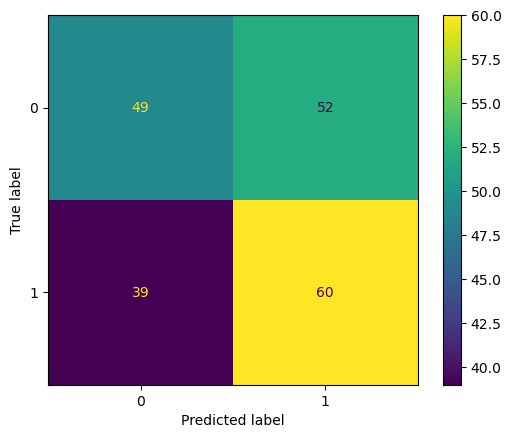

In [40]:
#compute values for confusion matrix
log_cm_ef = confusion_matrix(y_test, test_pred, labels=log_hair.classes_)

#create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm_ef, display_labels=log_hair.classes_)

#plot matrix
log_disp.plot(values_format='')

#display
plt.show()

In [41]:
#classification report 
print(classification_report(y_test, test_pred, target_names=target_names)) 

                               precision    recall  f1-score   support

Predicted would not lose hair       0.56      0.49      0.52       101
    Predicted would lose hair       0.54      0.61      0.57        99

                     accuracy                           0.55       200
                    macro avg       0.55      0.55      0.54       200
                 weighted avg       0.55      0.55      0.54       200



### Takeaways 

In testing the model on the unseen test data, we find that it performed better than with the validation set.

Test Accuracy - 54.5%  - Validation Accuracy - 50%

What is interesting with this set is that it did better at identifying True Positives from the data, while having an identical amount of True Negatives, meaning that the increased accuracy only really affected this space. We can see this in the decrease of false negatives. This does at least confirm that the model was not too overfitted to the training data, however, given different test data we may find similar scores to the validation set. 

### Conclusions

While This is good news in a way, the results are still not stellar, at least not for any promising use. No one should be using it to see if they will go bald. - Given that, I would recommend that more samples be collected, along with more features. This could include, but not limited to weight, their father's hair status, hat use, how many hours a week they work out (or if they work out regularly), sleep time, or sleep satisfaction. I do believe that with enough data, this can be something that can be predicted and prevented, benefiting countless people; myself included. - I would love to see this dataset updated for future use, but as it stands right now, there simply are not enough data points to make a sound prediction. 

I would like to add, after many hours of trials, feature engineering only helped this model marginally and did not show any promising signs of creating a useful model. 